In [6]:
import pandas as pd
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from PIL import Image

# Load the CSV file
csv_path = "C:/Users/USER/Desktop/image_label.csv"
df = pd.read_csv(csv_path)

# Load and preprocess data
images = []
labels = []

target_size = (224, 224)  

for index, row in df.iterrows():
    image_name = row["Image_name"]
    label = row["Plane"]

    image_path = os.path.join("C:/Users/USER/Desktop/train images", image_name + ".png")  
    
    # Load image using PIL 
    image = Image.open(image_path).convert("L")
    
    # Resize image
    image.thumbnail(target_size)
    
    # Create a blank canvas of the target size
    canvas = Image.new("L", target_size)
    canvas.paste(image, ((target_size[0] - image.width) // 2, (target_size[1] - image.height) // 2))
    
    # Convert image to numpy array and normalize
    image = np.array(canvas) / 255.0
    
   
    image = np.expand_dims(image, axis=-1)
    
    images.append(image)
    labels.append(label)

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#  CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Number of neurons matches the number of classes
])


from sklearn.metrics import accuracy_score

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
42/42 [==============================] - 18s 418ms/step - loss: 2.3074 - accuracy: 0.5304 - val_loss: 0.8694 - val_accuracy: 0.6424
Epoch 2/10
42/42 [==============================] - 17s 403ms/step - loss: 0.6694 - accuracy: 0.7713 - val_loss: 0.6967 - val_accuracy: 0.7485
Epoch 3/10
42/42 [==============================] - 17s 406ms/step - loss: 0.4143 - accuracy: 0.8769 - val_loss: 0.5906 - val_accuracy: 0.7727
Epoch 4/10
42/42 [==============================] - 17s 404ms/step - loss: 0.2062 - accuracy: 0.9567 - val_loss: 0.6581 - val_accuracy: 0.7606
Epoch 5/10
42/42 [==============================] - 17s 407ms/step - loss: 0.0989 - accuracy: 0.9871 - val_loss: 0.6189 - val_accuracy: 0.8182
Epoch 6/10
42/42 [==============================] - 17s 403ms/step - loss: 0.0753 - accuracy: 0.9856 - val_loss: 0.5921 - val_accuracy: 0.8091
Epoch 7/10
42/42 [==============================] - 17s 406ms/step - loss: 0.0246 - accuracy: 0.9970 - val_loss: 0.6077 - val_accuracy: 0.8091

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 50,467,780
Trainable params: 50,467,780
Non-trainable params: 0
____________________________________________

In [7]:
predictions = model.predict(X_test)


11/11 [==============================] - 1s 75ms/step


In [8]:
predicted_labels = np.argmax(predictions, axis=1)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "C:/Users/USER/Desktop/Patient01600_Plane6_1_of_8.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  

# Preprocess the image
resized_image = cv2.resize(image, (224, 224))
normalized_image = resized_image / 255.0
input_image = np.expand_dims(normalized_image, axis=-1)  

# Make prediction
prediction = model.predict(np.array([input_image]))


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 38ms/step


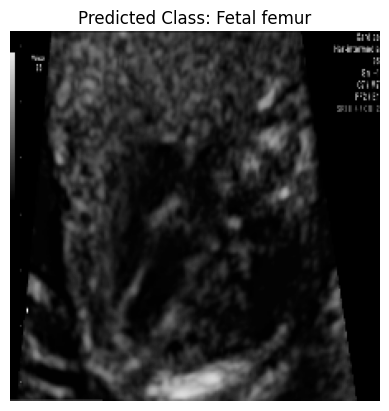

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = "C:/Users/USER/Desktop/Patient01600_Plane6_1_of_8.png"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
resized_image = cv2.resize(image, (224, 224))
normalized_image = resized_image / 255.0
input_image = np.expand_dims(normalized_image, axis=-1)

# Make prediction
prediction = model.predict(np.array([input_image]))

# Interpret prediction
predicted_class_index = np.argmax(prediction)
predicted_class_label = label_encoder.classes_[predicted_class_index]

# Display the image and predicted label
plt.imshow(resized_image, cmap='gray')
plt.title("Predicted Class: " + predicted_class_label)
plt.axis('off') 
plt.show()


1/1 [==============================] - 0s 30ms/step


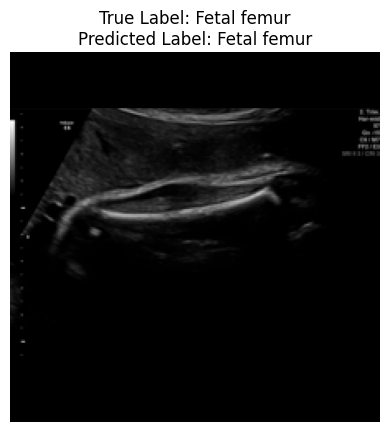

In [18]:
import matplotlib.pyplot as plt


test_image_index = 0  

# Get the test image and its corresponding label
test_image = X_test[test_image_index]
test_label_index = y_test[test_image_index]
test_label = label_encoder.classes_[test_label_index]

# Make a prediction for the test image
prediction = model.predict(np.array([test_image]))
predicted_class_index = np.argmax(prediction)
predicted_class_label = label_encoder.classes_[predicted_class_index]

# Display the test image and labels
plt.imshow(test_image.squeeze(), cmap='gray')  
plt.title(f"True Label: {test_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()
